In [1]:
from mvpa2 import cfg
from mvpa2.suite import *
import numpy as np
import glob
import os
from scipy.io import loadmat
from scipy.spatial.distance import squareform,pdist
from scipy.stats import rankdata,pearsonr
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns

/Users/frankanayet/anaconda/lib/python2.7/site-packages/numpy/lib/utils.py:99: DeprecationWarning: `scipy.weave` is deprecated, use `weave` instead!
  warnings.warn(depdoc, DeprecationWarning)
/Users/frankanayet/anaconda/lib/python2.7/site-packages/numpy/lib/utils.py:99: DeprecationWarning: `scipy.linalg.calc_lwork` is deprecated!

calc_lwork was an internal module in Scipy and has been removed.

Several functions in scipy.linalg.lapack have *_lwork variants
that perform the lwork calculation (from Scipy >= 0.15.0), or
allow passing in LWORK=-1 argument to perform the computation.


  warnings.warn(depdoc, DeprecationWarning)


In [2]:
#sns.set_style('white')
#sns.set_style('ticks')
#sns.set_palette('bright')
#sns.set_color_codes('bright')

In [3]:
basepath = '/fMRI/NLine'
os.chdir(basepath)

Define variables

In [4]:
SUBNUM = ['s_02010'] # Peter for now
LABELS = ['0.03', '0.07', '0.11', '0.21', '0.28', '0.33', '0.36', '0.45', '0.57', '0.6', '0.65', '0.74', '0.77',
          '0.85', '0.9', '0.98']
RUNS = ['run1','run2','run3','run4']
tasks = ['Pos', 'Neg', 'Word']
nr = len(SUBNUM)
#Changed the names of ROIs from Area1 and 2 to IPS0 L & R for consistency
ROIS = ['IPS_L_12mSphere.nii.gz', 'IPS_R_12mSphere.nii.gz', 'IPS0_L_standard.nii.gz', 'IPS0_R_standard.nii.gz']

In [5]:
field_names = []
for ROI in ROIS:
    roi = ROI.index('_')
    field_names.append(ROI[0:roi+2])
field_names

['IPS_L', 'IPS_R', 'IPS0_L', 'IPS0_R']

In [6]:
def plot_mtx(mtx, labels, title):
    #sns.set_palette('coolwarm',7)
    plt.figure(figsize=(10, 10))
    plt.imshow(mtx, interpolation='nearest')
    plt.xticks(range(len(mtx)), labels, rotation=-90)
    plt.yticks(range(len(mtx)), labels)
    plt.title(title)
    plt.clim((0,1))
    plt.colorbar()
    filename = subjpath+title+'.pdf'
    plt.savefig(filename)

/Users/frankanayet/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


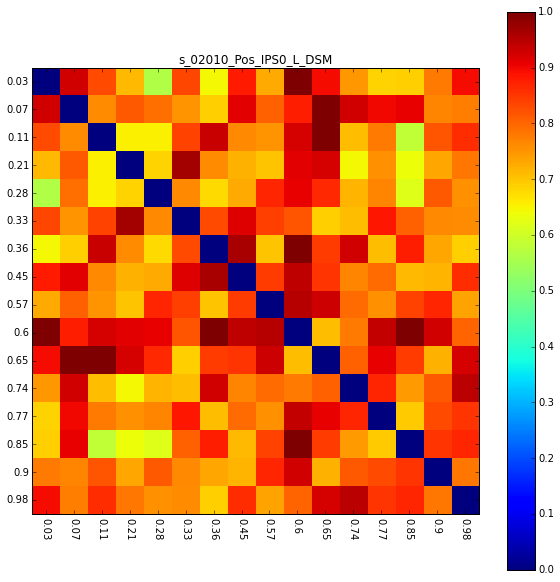

In [7]:
s = SUBNUM[0]
subjpath = basepath+'/'+s+'/Peter_ROI/'
ROI = ROIS[0]
ROIpath = subjpath+ROI
TASK = tasks[0]
brain_task = subjpath+'s_02010_run1_Pos_sorted_standard.nii.gz'
mat_name = s+'_'+TASK+'_'+field_names[2]+'_DSM'
ds = fmri_dataset(brain_task, mask=ROIpath)
dsm = measures.rsa.PDist(square=True)
res = dsm(ds)
plot_mtx(res, LABELS, mat_name)
brain_mat = dsm(ds).samples

In [8]:
#ax = sns.heatmap(res,vmin=0,vmax=1,xticklabels=LABELS,yticklabels=LABELS,cmap="coolwarm")

In [9]:
missing = basepath + '/missing_trials.csv'
missed = pd.read_csv(missing)
((missed['subject'] == 's_02014') & (missed['run'] == 1) & (missed['task'] == 'Word')).any()

True

In [10]:
missed

,Unnamed: 0,subject,run,task,stim
0,0,s_02018,0,Word,0.36
1,1,s_02018,3,Pos,0.74
2,2,s_02019,2,Neg,0.98
3,3,s_02015,2,Neg,0.98
4,4,s_02015,1,Pos,0.28
5,5,s_02024,1,Neg,0.36
6,6,s_02024,2,Neg,0.36
7,7,s_02024,1,Neg,0.77
8,8,s_02024,3,Word,0.65
9,9,s_02024,0,Pos,0.98


In [11]:
missed[(missed.subject=='s_02014') & (missed.run ==1) * (missed.task == 'Word')]['stim'].values

/Users/frankanayet/anaconda/lib/python2.7/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


array([ 0.11,  0.77,  0.98])

In [12]:
missed.loc[missed.run == 0, 'run'] = 'run1'
missed.loc[missed.run == 1, 'run'] = 'run2'
missed.loc[missed.run == 2, 'run'] = 'run3'
missed.loc[missed.run == 3, 'run'] = 'run4'
missed

,Unnamed: 0,subject,run,task,stim
0,0,s_02018,run1,Word,0.36
1,1,s_02018,run4,Pos,0.74
2,2,s_02019,run3,Neg,0.98
3,3,s_02015,run3,Neg,0.98
4,4,s_02015,run2,Pos,0.28
5,5,s_02024,run2,Neg,0.36
6,6,s_02024,run3,Neg,0.36
7,7,s_02024,run2,Neg,0.77
8,8,s_02024,run4,Word,0.65
9,9,s_02024,run1,Pos,0.98


In [13]:
stims = missed[(missed.subject=='s_02014') & (missed.run == 'run2') * (missed.task == 'Word')]['stim'].values

In [14]:
stims = [str(x) for x in stims]
stims

['0.11', '0.77', '0.98']

In [15]:
tmp_labels = [x for x in LABELS if x not in stims]
tmp_labels

['0.03',
 '0.07',
 '0.21',
 '0.28',
 '0.33',
 '0.36',
 '0.45',
 '0.57',
 '0.6',
 '0.65',
 '0.74',
 '0.85',
 '0.9']

s_02010
IPS_L_12mSphere.nii.gz
run1
/fMRI/NLine/s_02010/Peter_ROI//s_02010_run1_Pos_sorted_standard.nii.gz
run2
/fMRI/NLine/s_02010/Peter_ROI//s_02010_run2_Pos_sorted_standard.nii.gz
run3
/fMRI/NLine/s_02010/Peter_ROI//s_02010_run3_Pos_sorted_standard.nii.gz
run4
/fMRI/NLine/s_02010/Peter_ROI//s_02010_run4_Pos_sorted_standard.nii.gz
run1
/fMRI/NLine/s_02010/Peter_ROI//s_02010_run1_Neg_sorted_standard.nii.gz
run2
/fMRI/NLine/s_02010/Peter_ROI//s_02010_run2_Neg_sorted_standard.nii.gz
run3
/fMRI/NLine/s_02010/Peter_ROI//s_02010_run3_Neg_sorted_standard.nii.gz
run4
/fMRI/NLine/s_02010/Peter_ROI//s_02010_run4_Neg_sorted_standard.nii.gz
run1
/fMRI/NLine/s_02010/Peter_ROI//s_02010_run1_Word_sorted_standard.nii.gz
run2
/fMRI/NLine/s_02010/Peter_ROI//s_02010_run2_Word_sorted_standard.nii.gz
run3
/fMRI/NLine/s_02010/Peter_ROI//s_02010_run3_Word_sorted_standard.nii.gz
run4
/fMRI/NLine/s_02010/Peter_ROI//s_02010_run4_Word_sorted_standard.nii.gz
IPS_R_12mSphere.nii.gz
run1
/fMRI/NLine/s_02010/Peter

/Users/frankanayet/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


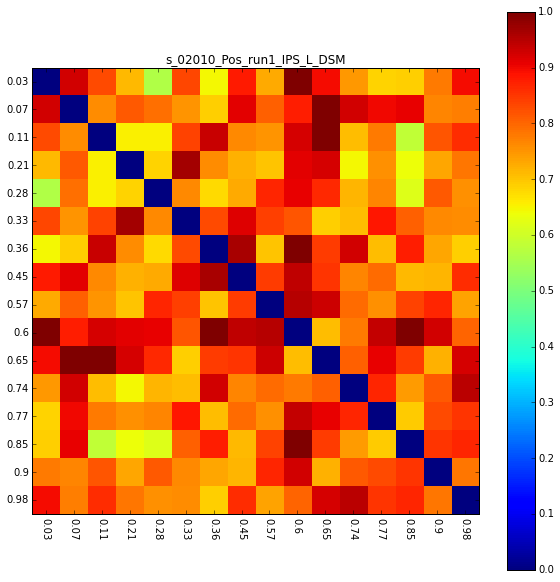

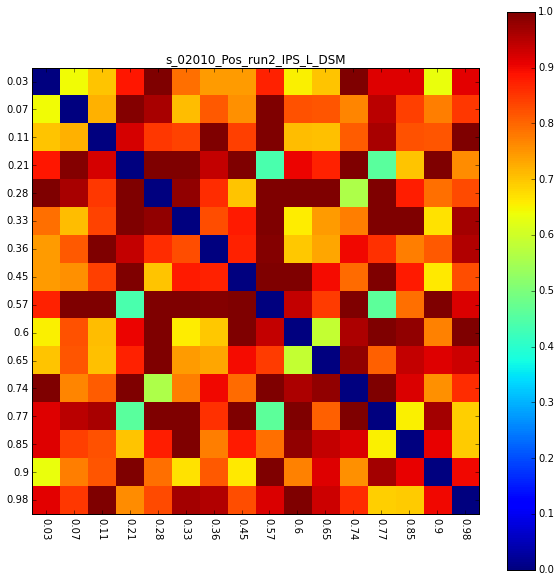

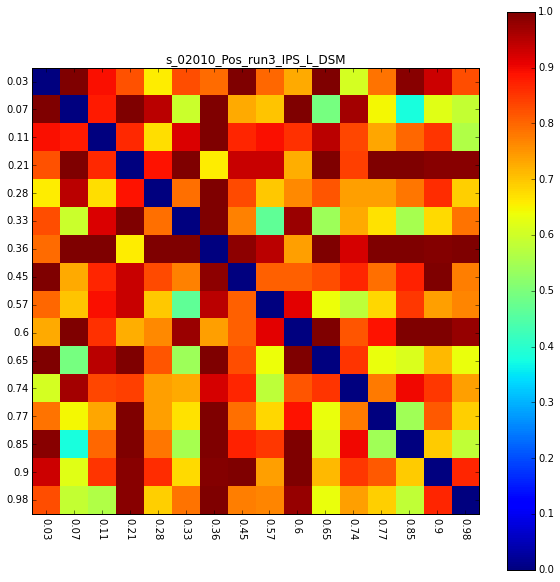

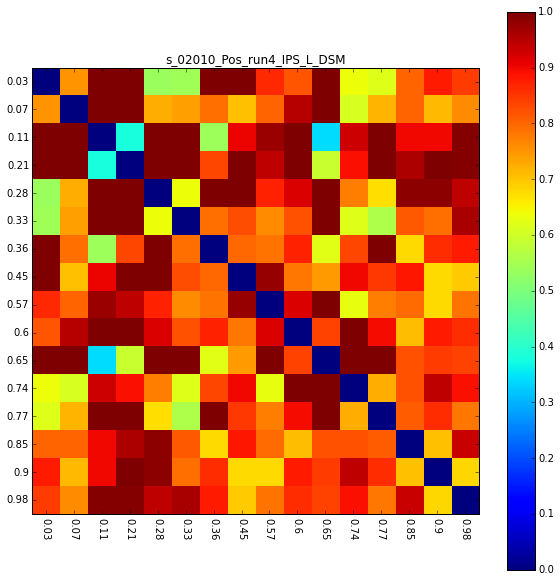

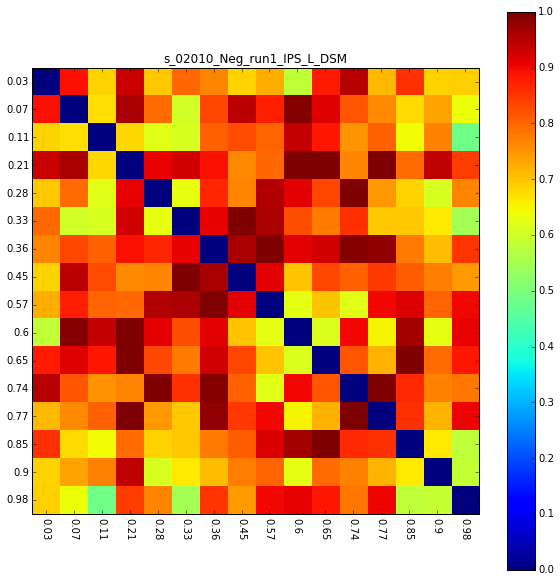

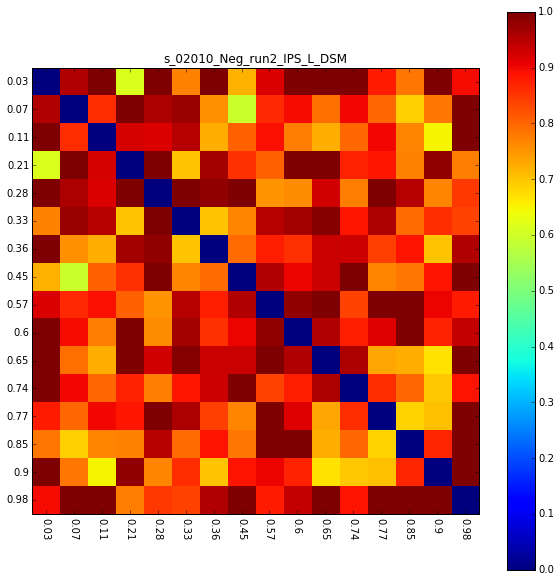

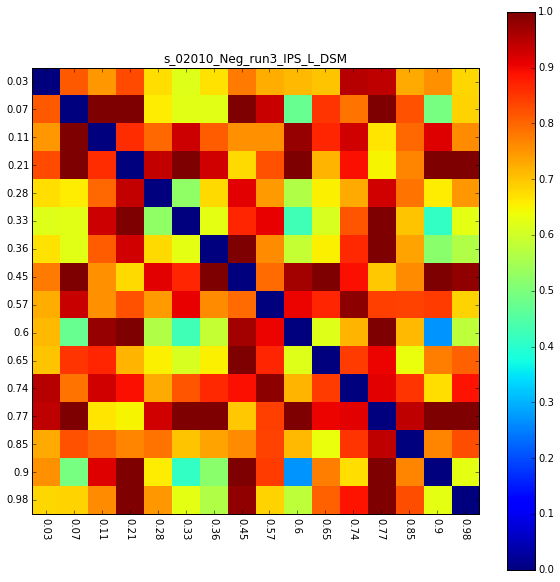

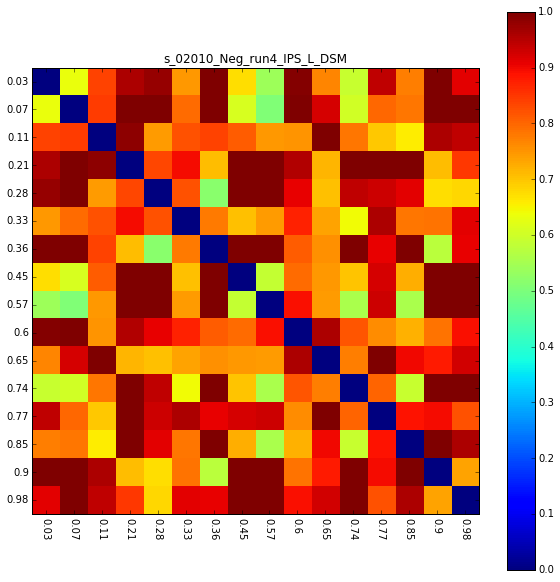

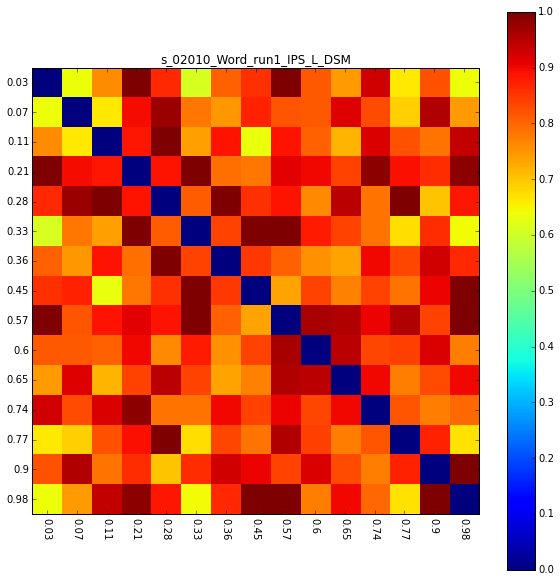

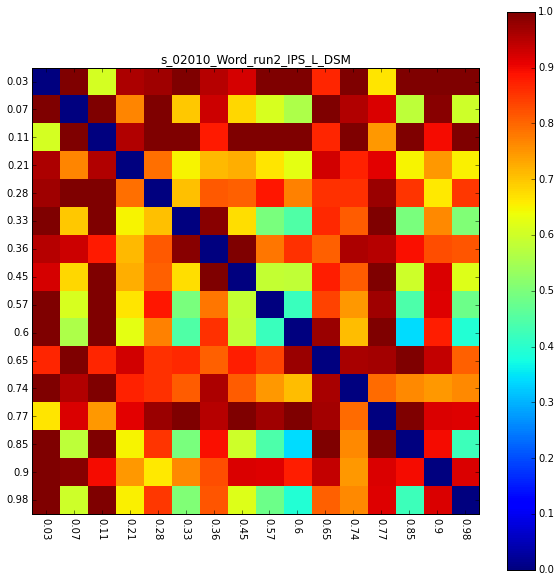

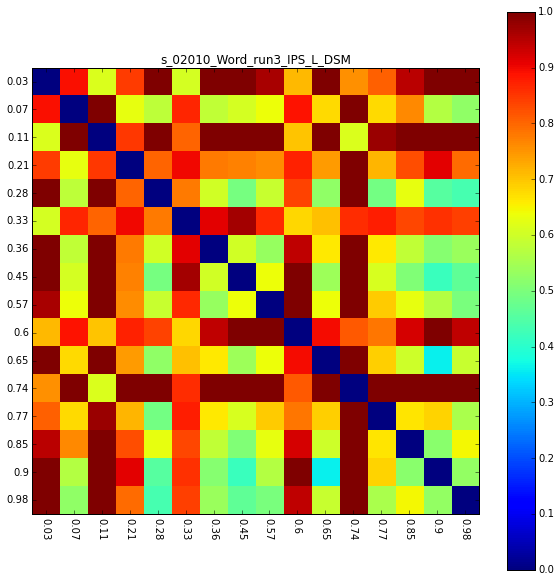

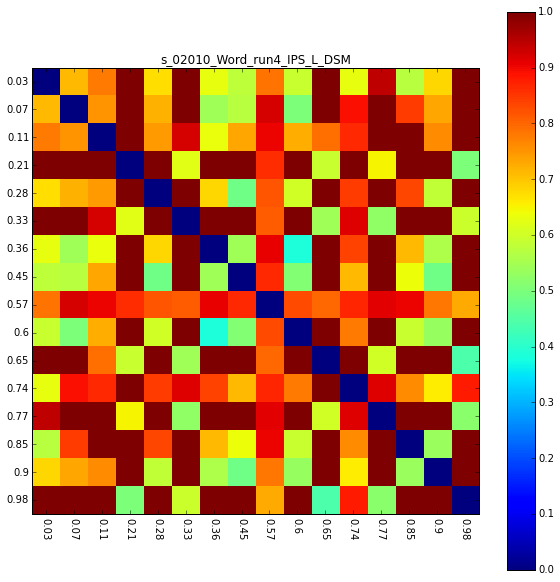

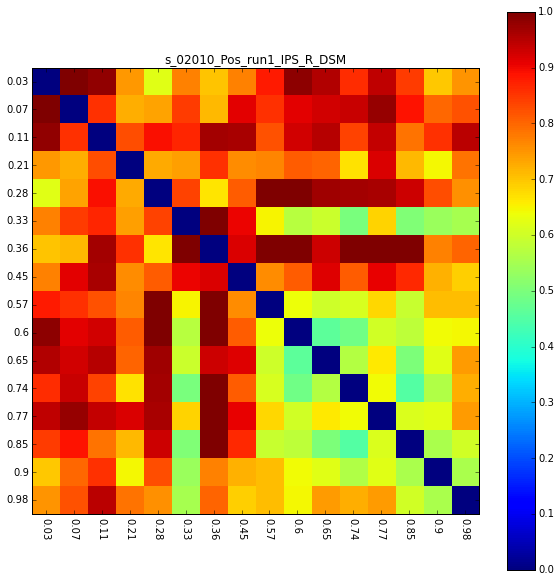

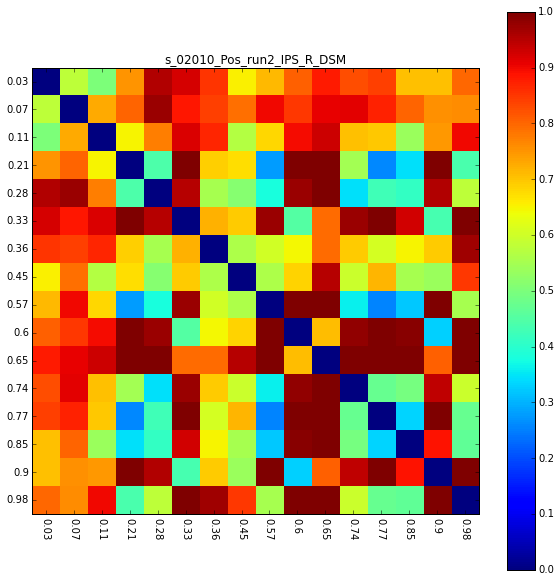

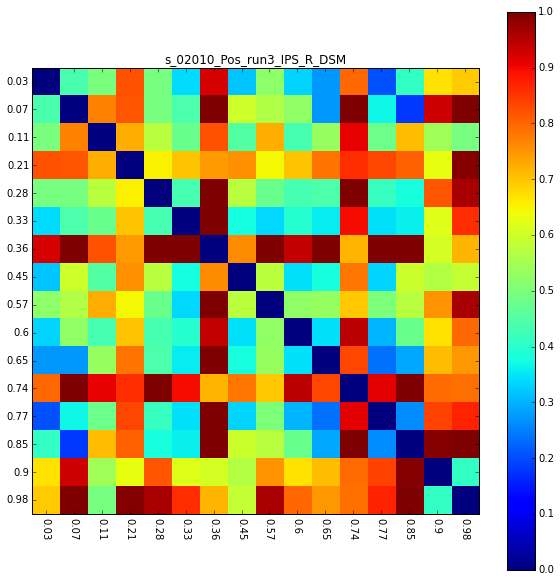

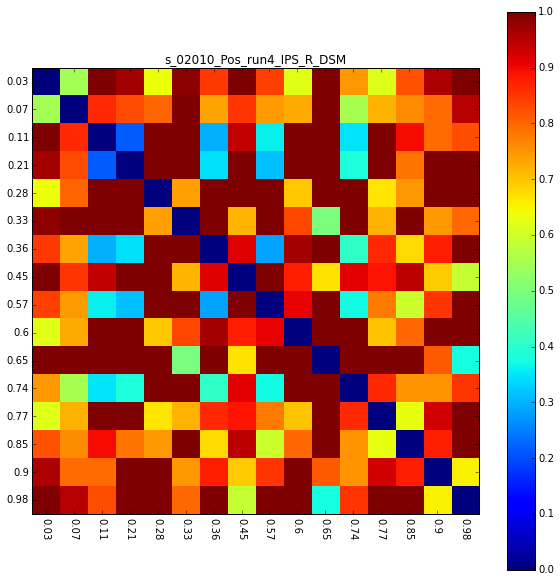

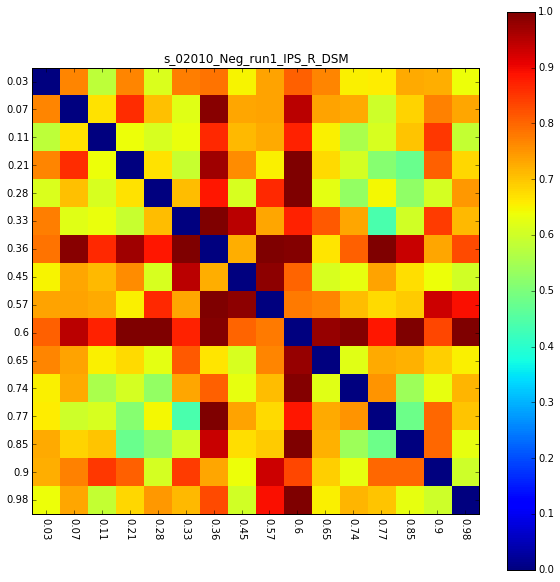

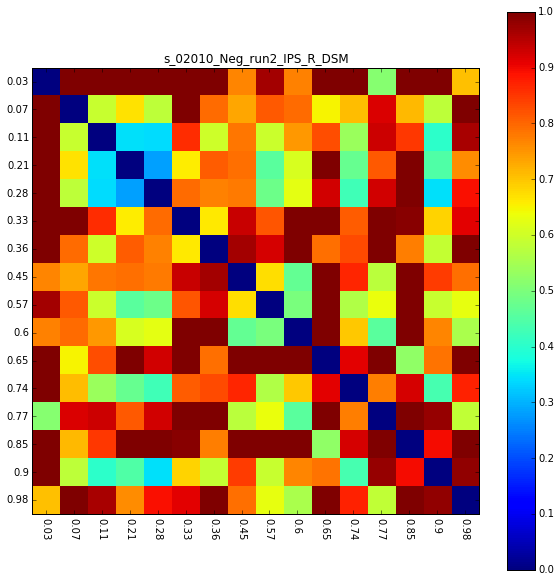

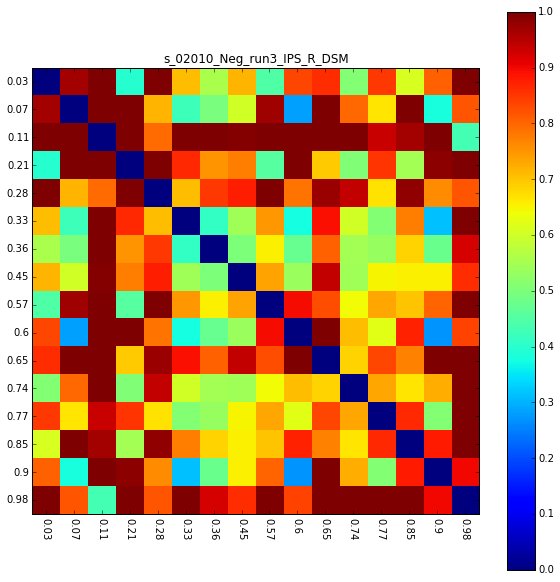

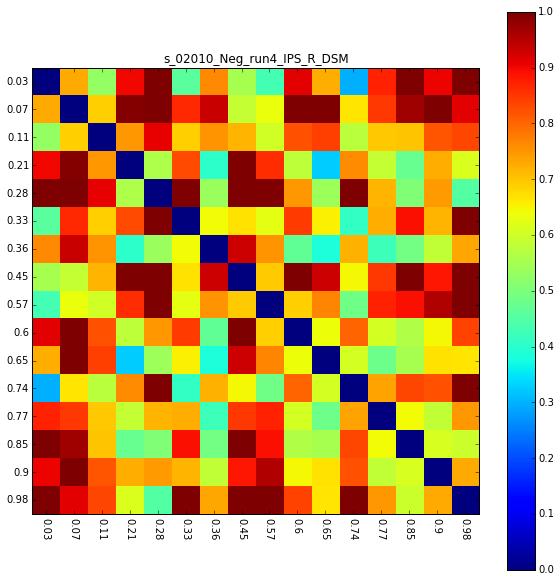

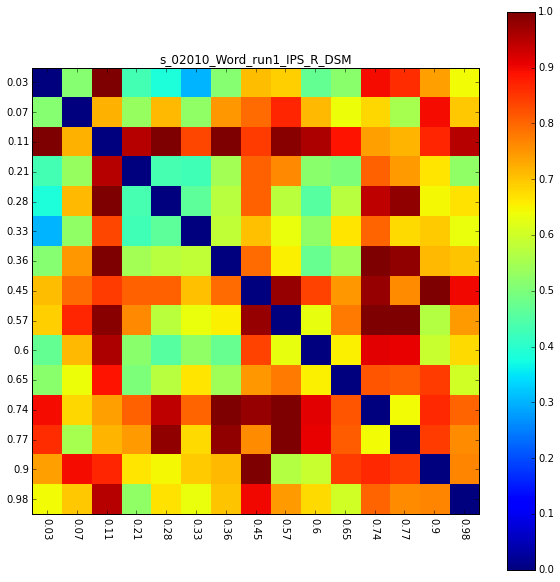

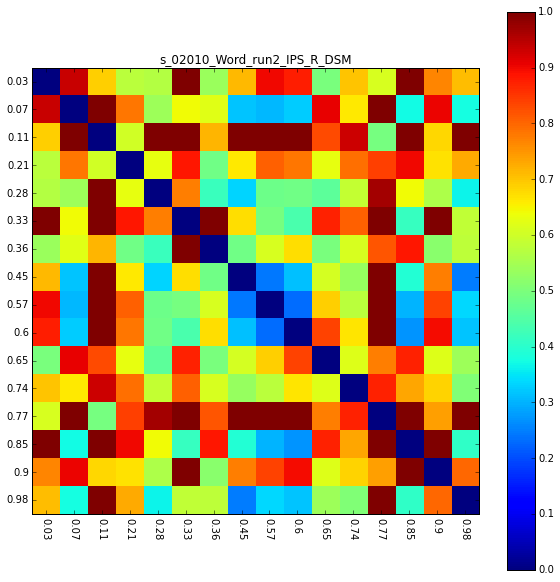

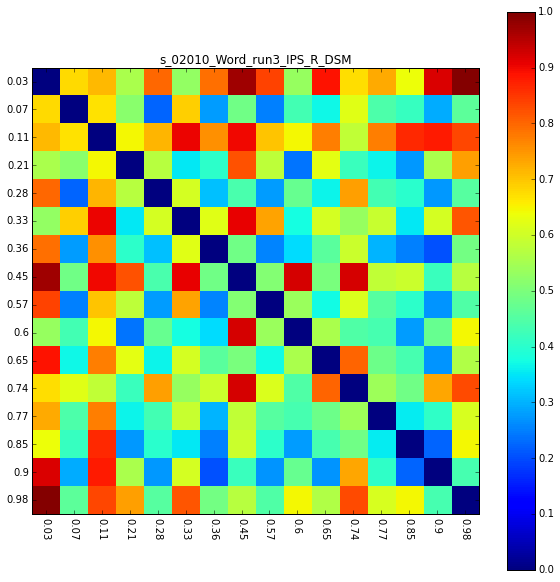

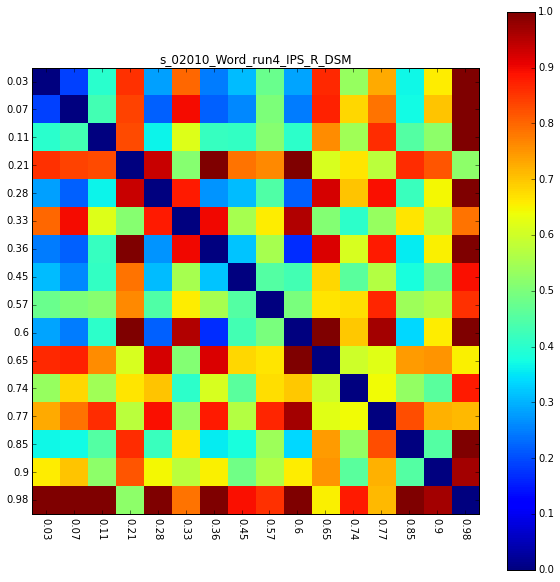

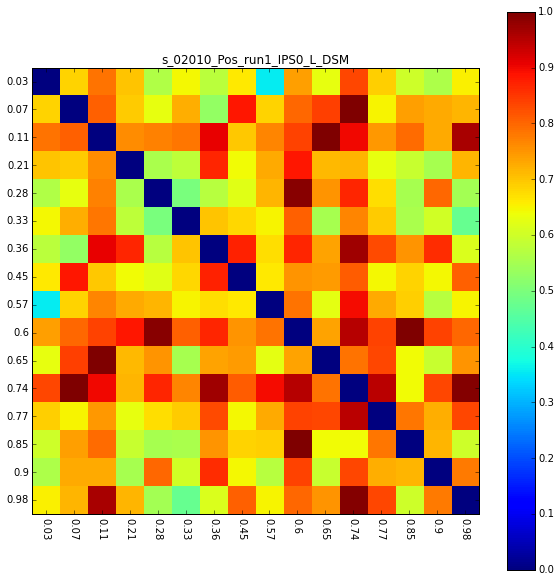

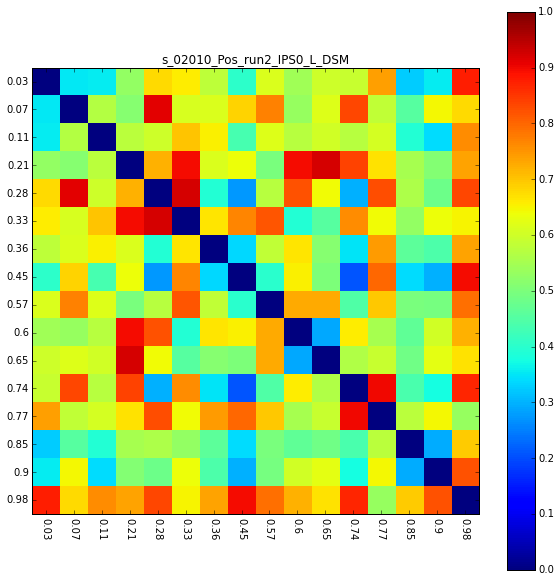

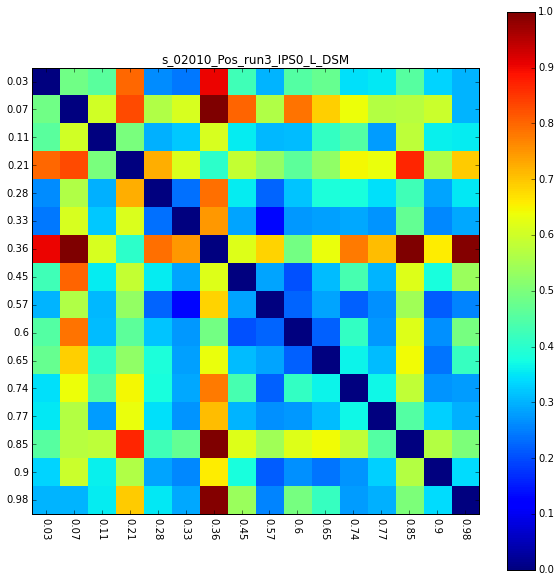

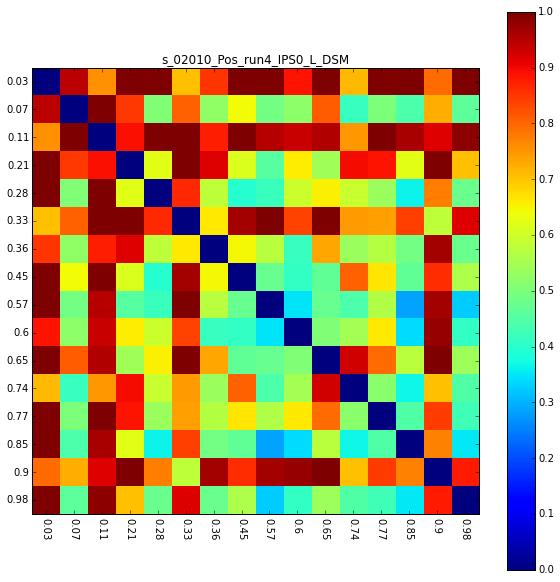

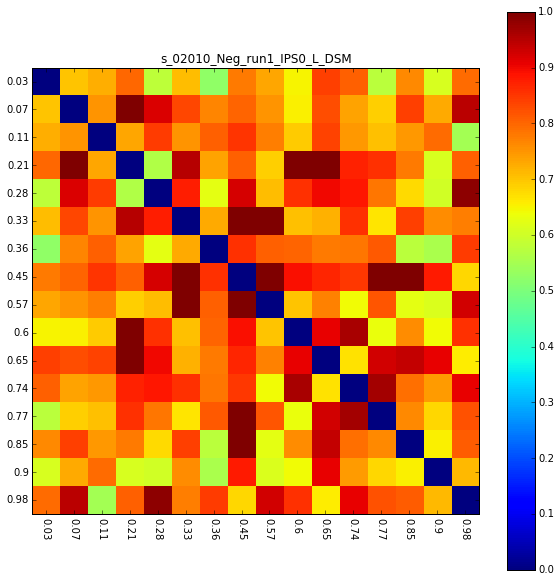

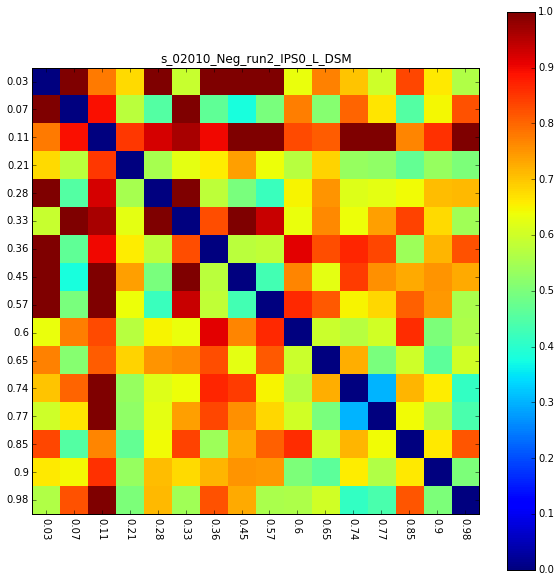

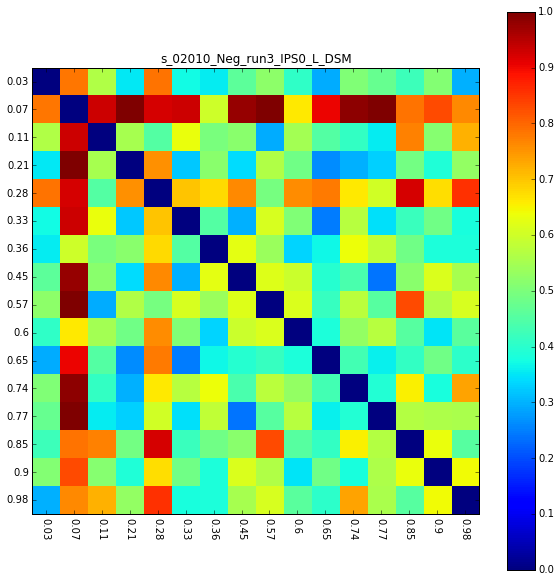

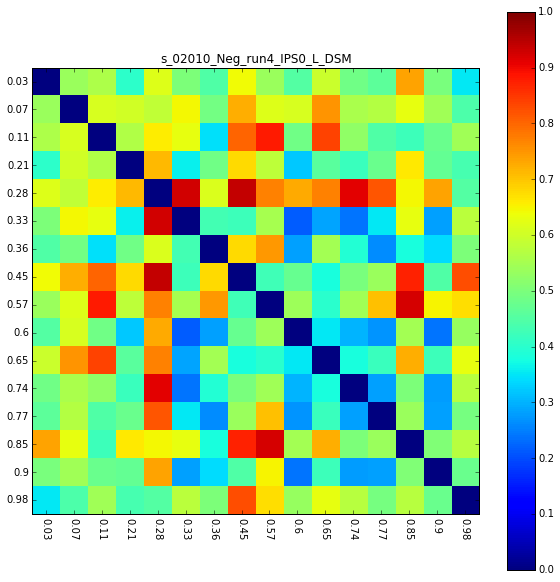

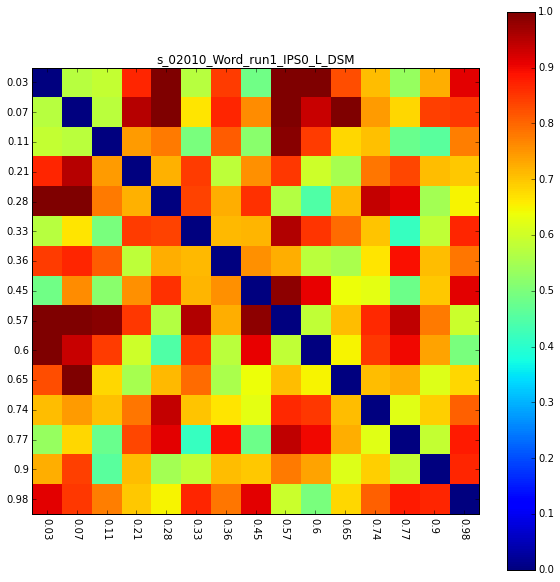

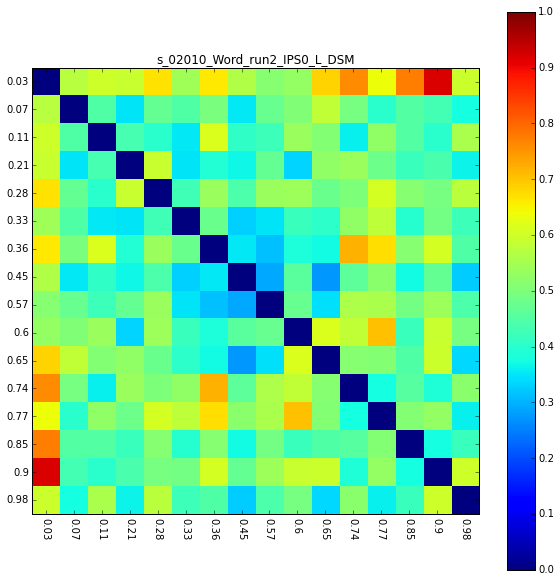

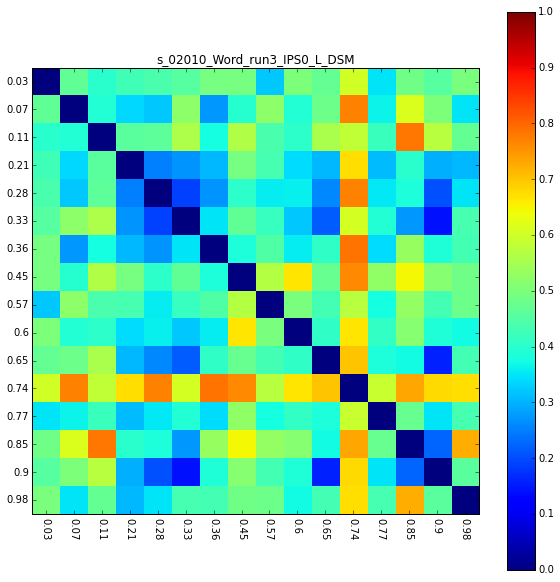

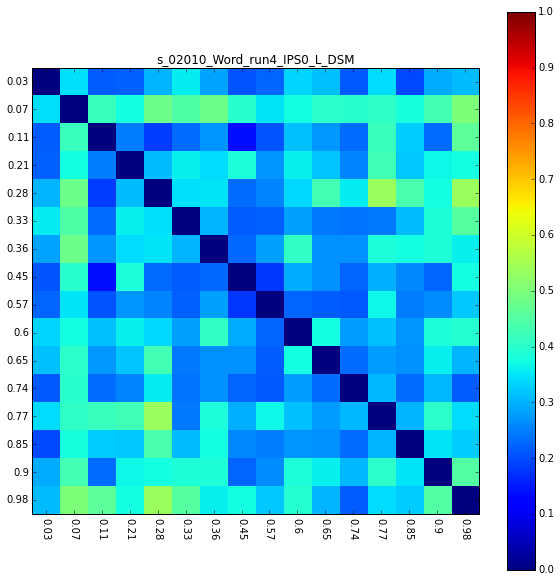

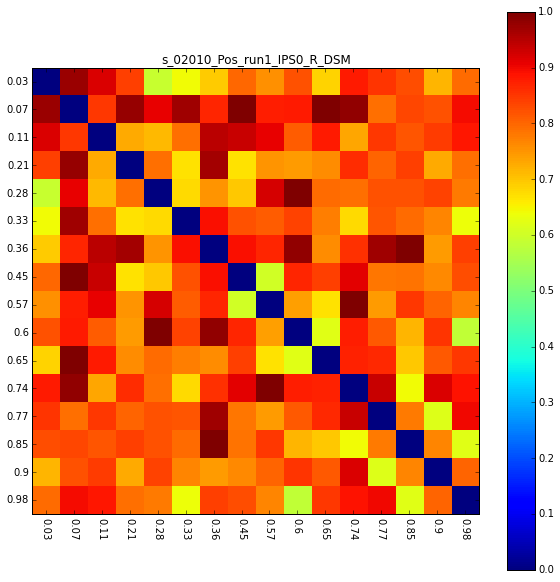

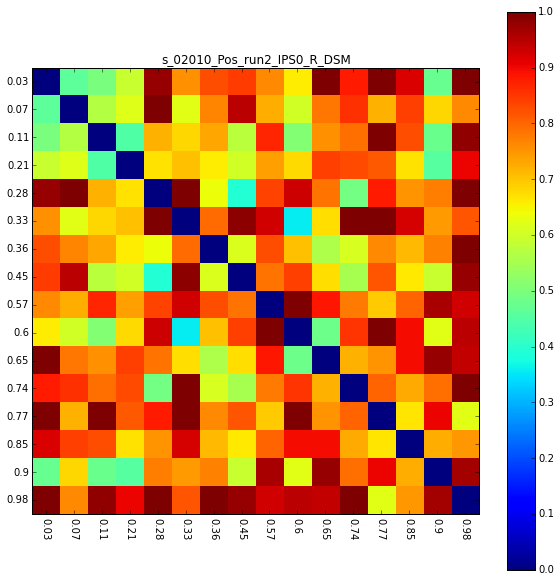

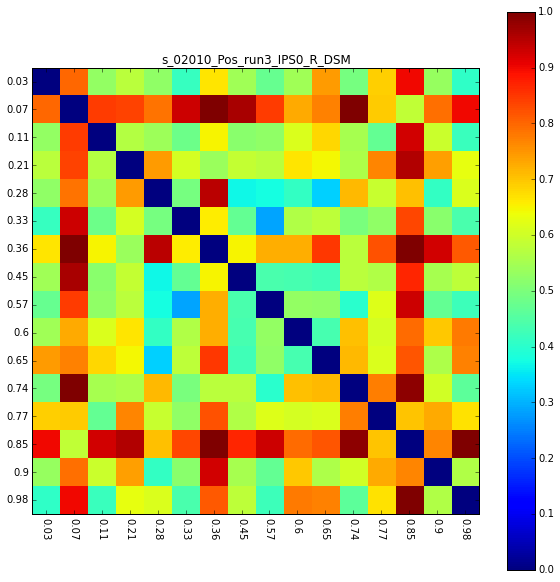

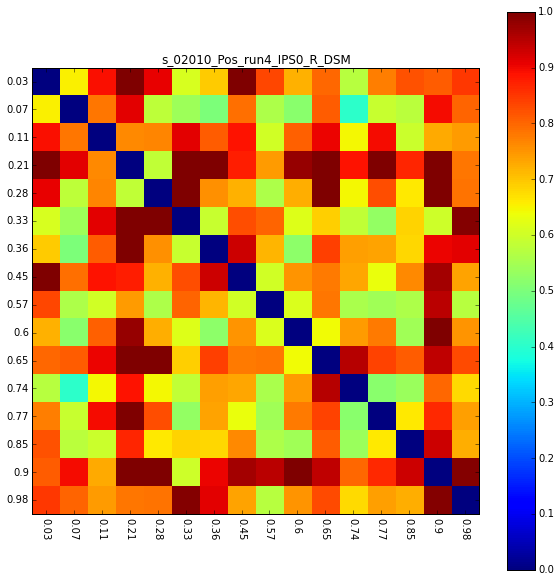

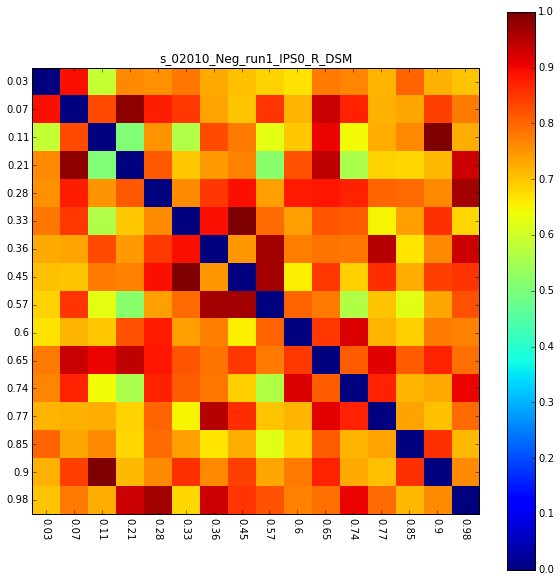

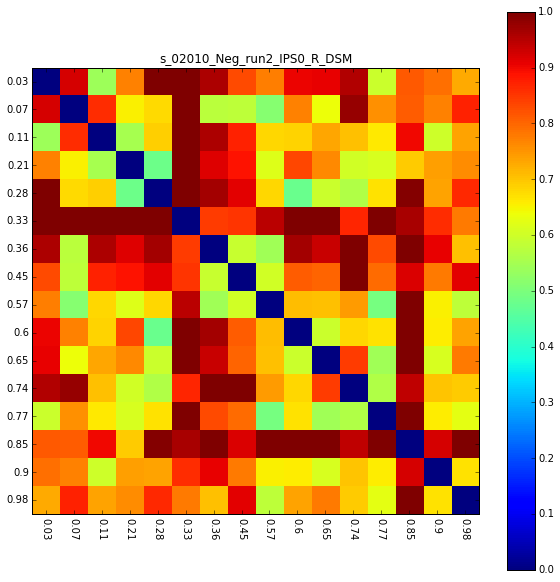

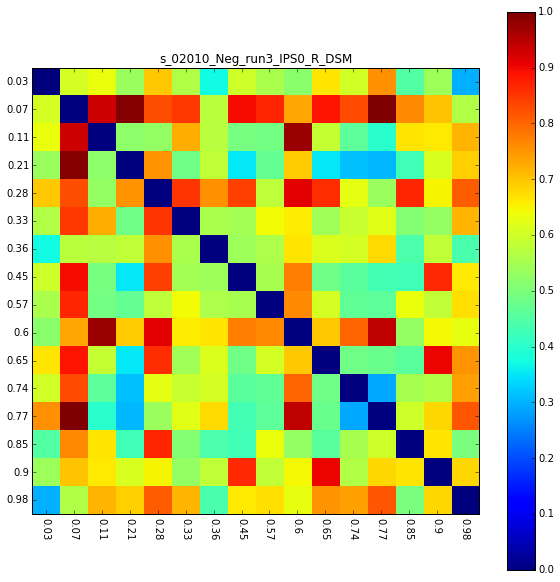

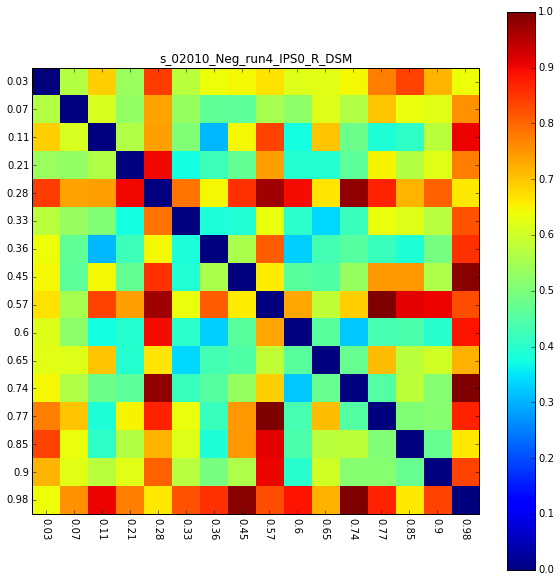

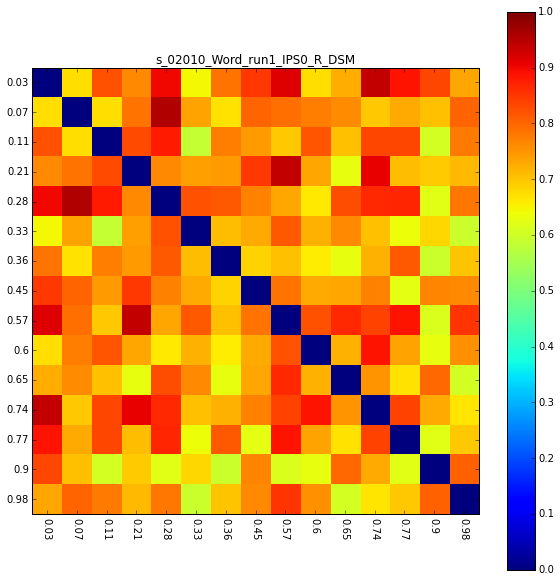

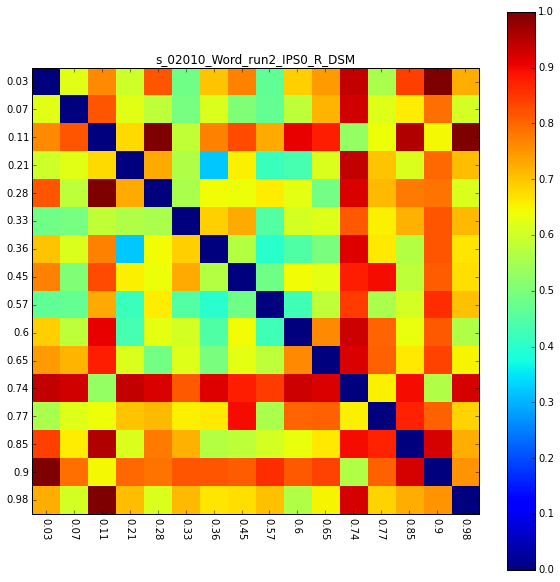

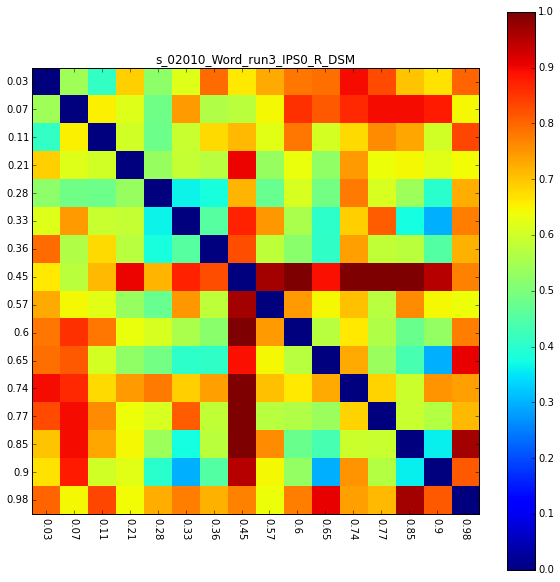

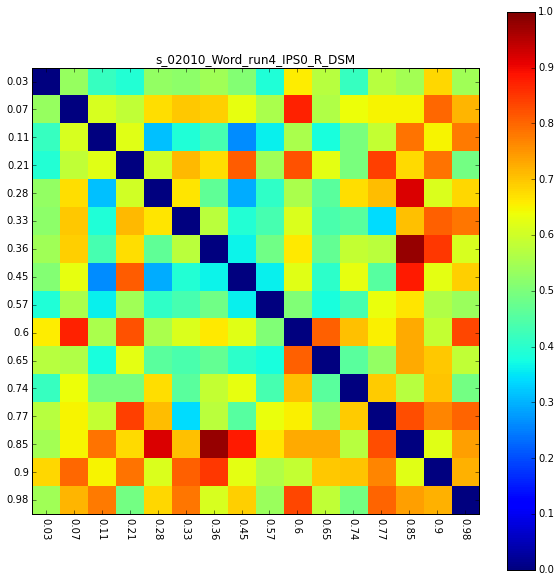

In [16]:
brain_mat_dict = {}
for s in SUBNUM:
    print s
    subjpath = basepath + '/' + s + '/Peter_ROI/'
    for roi in range(0,len(ROIS)):
        ROI = ROIS[roi]
        roi_path = subjpath+ROI
        brain_mat_dict[ROI] = {}
        #subjpath = path + '/' + s + '/2ndLevel_AllCond.gfeat'
        #subjpath = path + '/' + s + '/2ndLevel_AllCond_NC.gfeat'
        #print subjpath
        #os.chdir(subjpath)
        print ROI
        for TASK in tasks:
            brain_mat_dict[ROI][TASK] = []
            for RUN in RUNS:
                print RUN
                #brain_task = subjpath + '/' + TASK + '_allT.nii.gz'
                brain_task = subjpath + '/' + s + '_' + RUN + '_' + TASK + '_sorted_standard.nii.gz'
                mat_name = s+'_'+TASK+'_'+RUN+'_'+field_names[roi]+'_DSM'
                print brain_task
                
                #Find if there are missing stims
                if ((missed['subject'] == s) & (missed['run'] == RUN) & (missed['task'] == TASK)).any():
                    stims = missed[(missed.subject == s) & (missed.run == RUN) * (missed.task == TASK)]['stim'].values
                    stims = [str(x) for x in stims]
                    tmp_labels = [x for x in LABELS if x not in stims]
                    
                else:
                    tmp_labels = LABELS
                
                # define dataset and pick a specific mask (here target is irrelevant)
                ds = fmri_dataset(brain_task, mask=roi_path)
                
                
                # define the comparison
                dsm = measures.rsa.PDist(square=True)
                
                res = dsm(ds)
                
                plot_mtx(res, tmp_labels, mat_name)
                        
                #Grab the square brain matrix
                brain_mat = dsm(ds).samples
                
                #brain_mat = rankdata(brain_map) right now I am not using this but probably should
                # check if previous step is correct before using
                brain_mat_dict[ROI][TASK].append(brain_mat)

In [17]:
brain_mat_dict[ROIS[2]]['Pos']

[array([[ 0.        ,  0.68563981,  0.7863547 ,  0.70000782,  0.56259795,
          0.64742204,  0.57660948,  0.66034609,  0.35656249,  0.73892391,
          0.62918412,  0.8320965 ,  0.69040971,  0.6000096 ,  0.56184635,
          0.65496985],
        [ 0.68563981,  0.        ,  0.80693718,  0.69478155,  0.62970538,
          0.72271095,  0.52802088,  0.88370094,  0.68696246,  0.79870096,
          0.84036629,  1.0446273 ,  0.64847932,  0.73895938,  0.72837353,
          0.71780066],
        [ 0.7863547 ,  0.80693718,  0.        ,  0.75795794,  0.77072469,
          0.78374818,  0.90671042,  0.69825158,  0.76930854,  0.83860788,
          1.06723181,  0.90177111,  0.74710118,  0.79338017,  0.72794459,
          0.96121792],
        [ 0.70000782,  0.69478155,  0.75795794,  0.        ,  0.55686689,
          0.57938528,  0.86843418,  0.64337619,  0.72729053,  0.88416309,
          0.71212175,  0.71853701,  0.62919442,  0.59237355,  0.5510076 ,
          0.71534402],
        [ 0.56259795

In [18]:
brain_mat_dict.keys()

['IPS_L_12mSphere.nii.gz',
 'IPS0_R_standard.nii.gz',
 'IPS0_L_standard.nii.gz',
 'IPS_R_12mSphere.nii.gz']

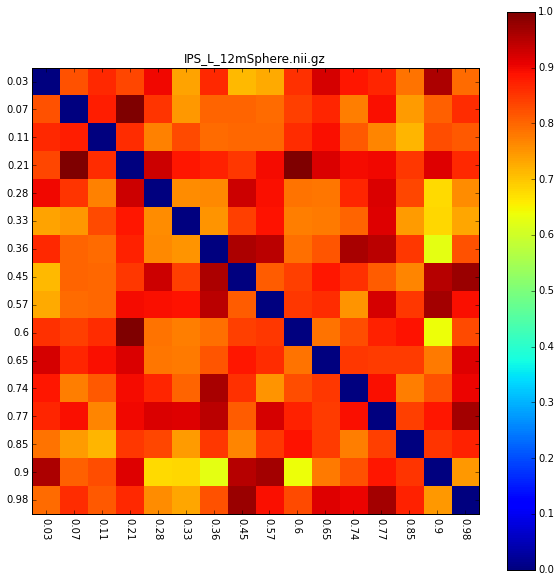

In [23]:
ex_average_mat = np.average(brain_mat_dict[ROIS[0]]['Neg'],axis=0)
plot_mtx(ex_average_mat,LABELS,brain_mat_dict.keys()[0])

In [24]:
brain_mat_dict[brain_mat_dict.keys()[0]]

{'Neg': [array([[ 0.        ,  0.89099681,  0.68428467,  0.93373185,  0.69617678,
           0.79841047,  0.76699914,  0.68456304,  0.72567586,  0.58585669,
           0.88280248,  0.95197827,  0.7128921 ,  0.85710866,  0.6841445 ,
           0.69050309],
         [ 0.89099681,  0.        ,  0.67289415,  0.96289891,  0.7949201 ,
           0.60476226,  0.8348208 ,  0.94616513,  0.87850932,  0.99382627,
           0.91498772,  0.81827519,  0.76369423,  0.67760028,  0.73617217,
           0.63691749],
         [ 0.68428467,  0.67289415,  0.        ,  0.68118341,  0.62277316,
           0.61043284,  0.8080728 ,  0.82910757,  0.8038093 ,  0.94114851,
           0.88561257,  0.75283847,  0.80710499,  0.64197883,  0.77105275,
           0.4859504 ],
         [ 0.93373185,  0.96289891,  0.68118341,  0.        ,  0.9096126 ,
           0.92843743,  0.89098532,  0.76174231,  0.7969154 ,  1.11620251,
           1.03827405,  0.76849238,  0.99824018,  0.79588908,  0.94422606,
           0.84400626

In [25]:
stims

['0.85']

In [26]:
stims = missed[(missed.subject=='s_02010') & (missed.run == 'run1') * (missed.task == 'Word')]['stim'].values
stims = [str(x) for x in stims]
miss_idx = LABELS.index(stims[0])
miss_idx

13

In [27]:
brain_mat_dict[brain_mat_dict.keys()[0]]['Word'][0]

array([[ 0.        ,  0.6401553 ,  0.76027993,  1.03313234,  0.86605275,
         0.60983137,  0.80533932,  0.85849195,  1.05766275,  0.81273138,
         0.7449384 ,  0.92915772,  0.66288596,  0.821793  ,  0.6396466 ],
       [ 0.6401553 ,  0.        ,  0.66020234,  0.89533859,  0.97517358,
         0.78298831,  0.74973752,  0.87131104,  0.8165478 ,  0.8144044 ,
         0.91493533,  0.83048948,  0.69020173,  0.95539039,  0.74246022],
       [ 0.76027993,  0.66020234,  0.        ,  0.88563458,  1.04863271,
         0.74169631,  0.88996666,  0.63363731,  0.88968822,  0.80754999,
         0.71546821,  0.92112641,  0.82051076,  0.78813963,  0.94006819],
       [ 1.03313234,  0.89533859,  0.88563458,  0.        ,  0.88995479,
         1.05019234,  0.79198636,  0.78330212,  0.91265246,  0.89978546,
         0.83783086,  0.9862507 ,  0.89378588,  0.86063889,  0.98486711],
       [ 0.86605275,  0.97517358,  1.04863271,  0.88995479,  0.        ,
         0.81207411,  1.09821903,  0.85648487, 

In [28]:
tmp_mat = np.empty((16,16))
tmp_mat[:] = np.NAN
tmp_mat[0:miss_idx,0:miss_idx] = brain_mat_dict[brain_mat_dict.keys()[0]]['Word'][0][0:miss_idx,0:miss_idx]
tmp_mat[miss_idx+1:,0:miss_idx] = brain_mat_dict[brain_mat_dict.keys()[0]]['Word'][0][miss_idx:,0:miss_idx]
tmp_mat[0:miss_idx,miss_idx+1:] = brain_mat_dict[brain_mat_dict.keys()[0]]['Word'][0][0:miss_idx,miss_idx:]
tmp_mat[miss_idx+1:,miss_idx+1:] = brain_mat_dict[brain_mat_dict.keys()[0]]['Word'][0][miss_idx:,miss_idx:]
tmp_mat

array([[ 0.        ,  0.6401553 ,  0.76027993,  1.03313234,  0.86605275,
         0.60983137,  0.80533932,  0.85849195,  1.05766275,  0.81273138,
         0.7449384 ,  0.92915772,  0.66288596,         nan,  0.821793  ,
         0.6396466 ],
       [ 0.6401553 ,  0.        ,  0.66020234,  0.89533859,  0.97517358,
         0.78298831,  0.74973752,  0.87131104,  0.8165478 ,  0.8144044 ,
         0.91493533,  0.83048948,  0.69020173,         nan,  0.95539039,
         0.74246022],
       [ 0.76027993,  0.66020234,  0.        ,  0.88563458,  1.04863271,
         0.74169631,  0.88996666,  0.63363731,  0.88968822,  0.80754999,
         0.71546821,  0.92112641,  0.82051076,         nan,  0.78813963,
         0.94006819],
       [ 1.03313234,  0.89533859,  0.88563458,  0.        ,  0.88995479,
         1.05019234,  0.79198636,  0.78330212,  0.91265246,  0.89978546,
         0.83783086,  0.9862507 ,  0.89378588,         nan,  0.86063889,
         0.98486711],
       [ 0.86605275,  0.97517358,  1

In [29]:
for s in SUBNUM:
    print s
    for roi in range(0,len(ROIS)):
        ROI = ROIS[roi]
        print ROI
        for TASK in tasks:
            for RUN in range(0,len(RUNS)):
                print RUN                
                #Find if there are missing stims
                if ((missed['subject'] == s) & (missed['run'] == RUNS[RUN]) & (missed['task'] == TASK)).any():
                    print 'missing'
                    stims = missed[(missed.subject == s) & (missed.run == RUNS[RUN]) * (missed.task == TASK)]['stim'].values
                    stims = [str(x) for x in stims]
                    for STIM in stims:
                        print STIM
                        tmp_mat = np.empty((16,16))
                        tmp_mat[:] = np.NAN
                        miss_idx = LABELS.index(STIM)
                        tmp_mat[0:miss_idx,0:miss_idx] = brain_mat_dict[ROI][TASK][RUN][0:miss_idx,0:miss_idx]
                        tmp_mat[miss_idx+1:,0:miss_idx] = brain_mat_dict[ROI][TASK][RUN][miss_idx:,0:miss_idx]
                        tmp_mat[0:miss_idx,miss_idx+1:] = brain_mat_dict[ROI][TASK][RUN][0:miss_idx,miss_idx:]
                        tmp_mat[miss_idx+1:,miss_idx+1:] = brain_mat_dict[ROI][TASK][RUN][miss_idx:,miss_idx:]
                        brain_mat_dict[ROI][TASK][RUN] = tmp_mat
                        
                        

s_02010
IPS_L_12mSphere.nii.gz
0
1
2
3
0
1
2
3
0
missing
0.85
1
2
3
IPS_R_12mSphere.nii.gz
0
1
2
3
0
1
2
3
0
missing
0.85
1
2
3
IPS0_L_standard.nii.gz
0
1
2
3
0
1
2
3
0
missing
0.85
1
2
3
IPS0_R_standard.nii.gz
0
1
2
3
0
1
2
3
0
missing
0.85
1
2
3


In [30]:
brain_mat_dict[brain_mat_dict.keys()[0]]['Word']

[array([[ 0.        ,  0.6401553 ,  0.76027993,  1.03313234,  0.86605275,
          0.60983137,  0.80533932,  0.85849195,  1.05766275,  0.81273138,
          0.7449384 ,  0.92915772,  0.66288596,         nan,  0.821793  ,
          0.6396466 ],
        [ 0.6401553 ,  0.        ,  0.66020234,  0.89533859,  0.97517358,
          0.78298831,  0.74973752,  0.87131104,  0.8165478 ,  0.8144044 ,
          0.91493533,  0.83048948,  0.69020173,         nan,  0.95539039,
          0.74246022],
        [ 0.76027993,  0.66020234,  0.        ,  0.88563458,  1.04863271,
          0.74169631,  0.88996666,  0.63363731,  0.88968822,  0.80754999,
          0.71546821,  0.92112641,  0.82051076,         nan,  0.78813963,
          0.94006819],
        [ 1.03313234,  0.89533859,  0.88563458,  0.        ,  0.88995479,
          1.05019234,  0.79198636,  0.78330212,  0.91265246,  0.89978546,
          0.83783086,  0.9862507 ,  0.89378588,         nan,  0.86063889,
          0.98486711],
        [ 0.86605275

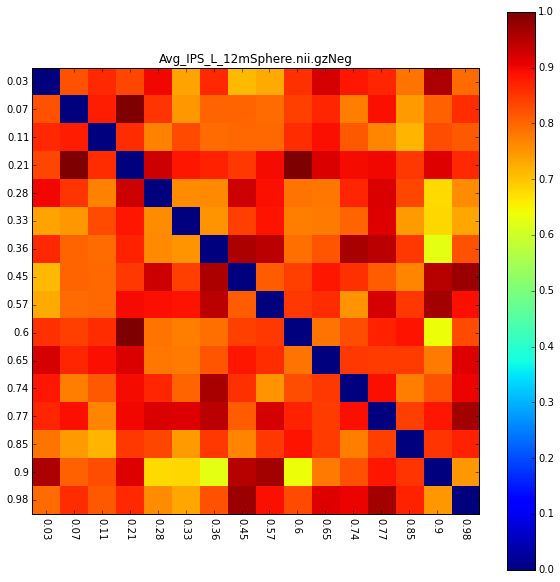

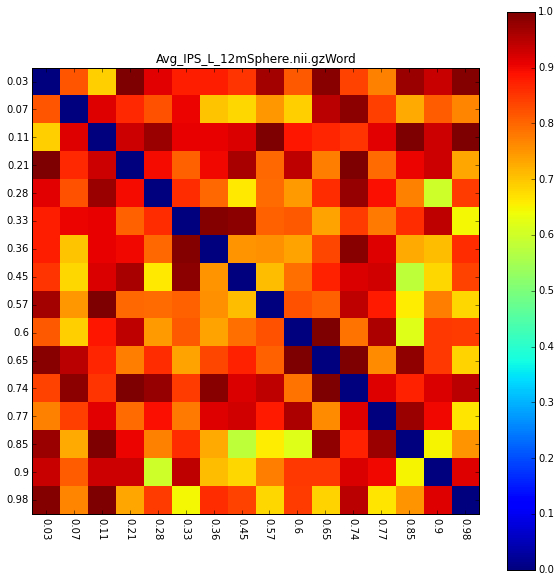

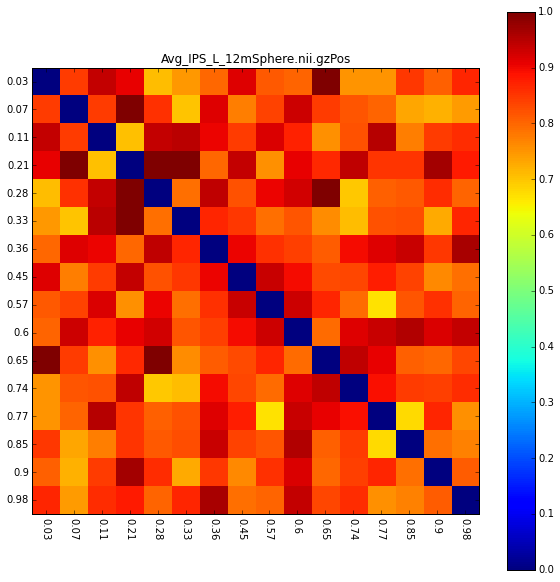

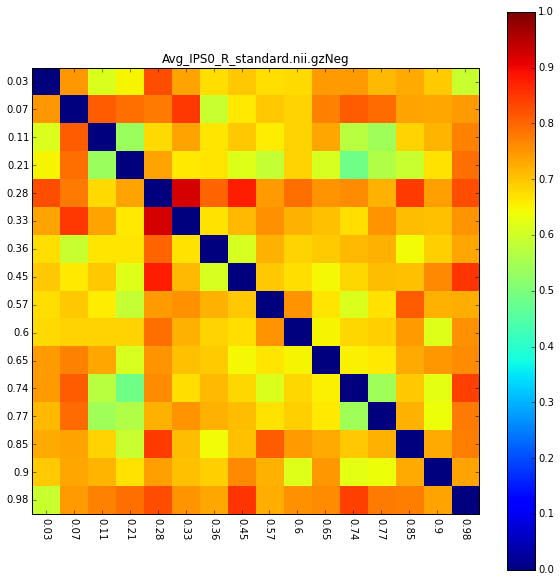

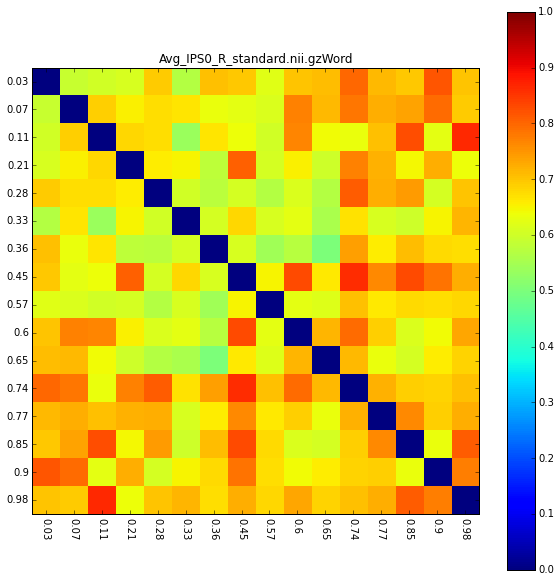

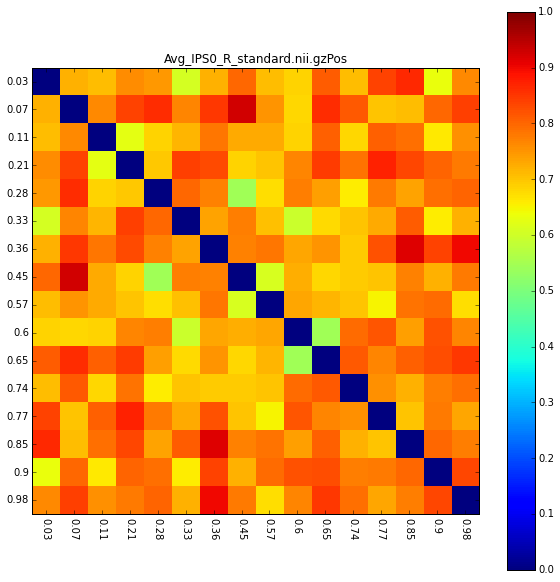

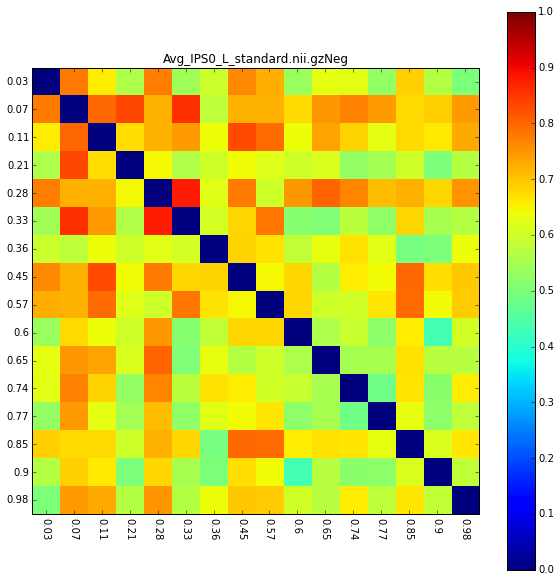

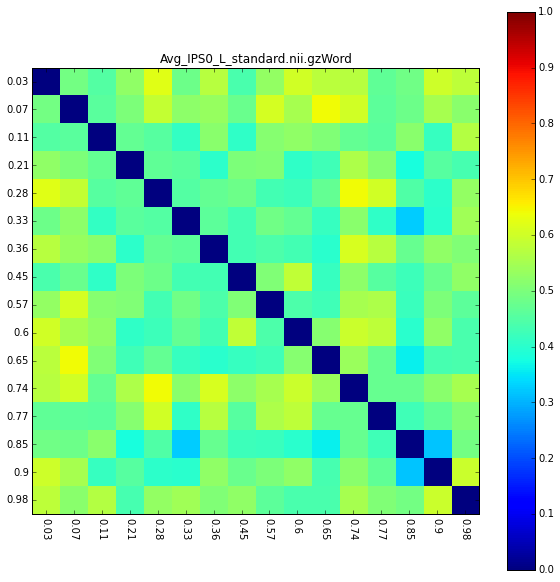

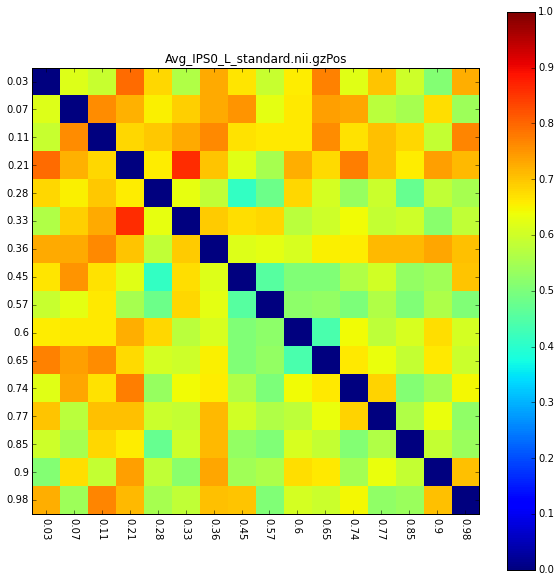

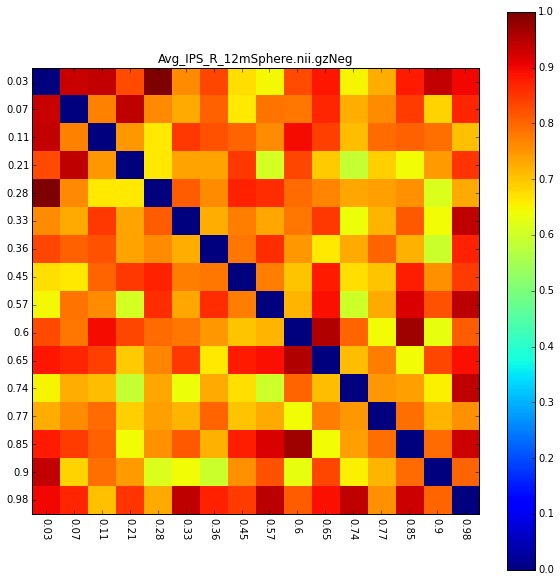

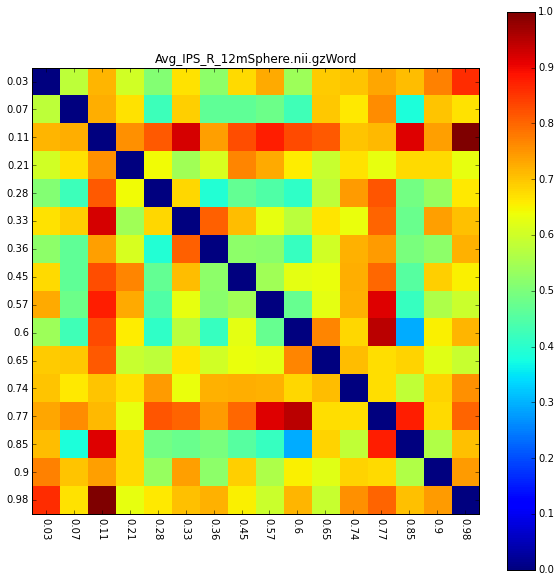

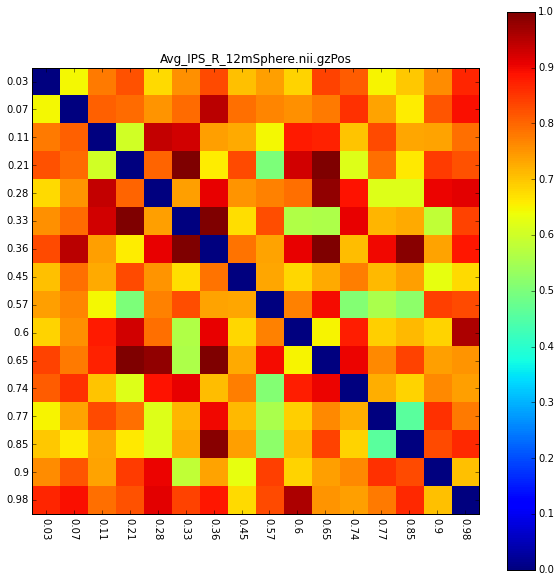

In [31]:
for ROI in brain_mat_dict.keys():
    for TASK in brain_mat_dict[ROI].keys():
        avg_mat = np.nanmean(brain_mat_dict[ROI][TASK], axis=0)
        tit = 'Avg_'+ROI+TASK
        plot_mtx(avg_mat,LABELS,tit)

In [32]:
from sklearn import manifold
from sklearn.decomposition import PCA

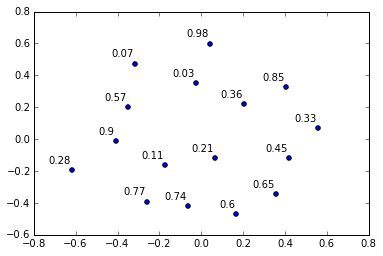

In [33]:
ex_average_mat = np.average(brain_mat_dict[ROIS[3]]['Neg'],axis=0)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(ex_average_mat).embedding_
# Rotate the data
#clf = PCA(n_components=2)
#pos = clf.fit_transform(pos)
plt.scatter(pos[:, 0], pos[:, 1], s=20, c='b')
for label, x, y in zip(LABELS, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-2, 5),
        textcoords = 'offset points', ha = 'right', va = 'bottom')

In [34]:
s = SUBNUM[0]
subjpath = basepath+'/'+s+'/Peter_ROI/'
ROI = ROIS[0]
ROIpath = subjpath+ROI
TASK = tasks[0]
brain_task = subjpath+'s_02010_run1_Pos_sorted_standard.nii.gz'
mat_name = s+'_'+TASK+'_'+field_names[2]+'_DSM'
ds = fmri_dataset(brain_task, mask=ROIpath)
dsm = measures.rsa.PDist(square=True)
res = dsm(ds)



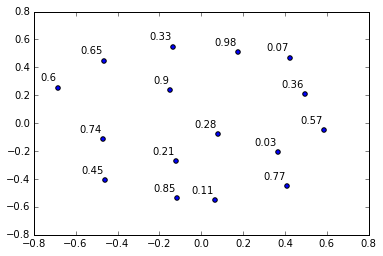

In [112]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(res).embedding_
# Rotate the data
#clf = PCA(n_components=2)
#pos = clf.fit_transform(pos)
plt.scatter(pos[:, 0], pos[:, 1], s=20, c='b')
for label, x, y in zip(LABELS, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-2, 5),
        textcoords = 'offset points', ha = 'right', va = 'bottom')

In [35]:
def plot_mds(pos, labels, title):
    #sns.set_palette('coolwarm',7)
    plt.figure(figsize=(10, 10))
    plt.scatter(pos[:, 0], pos[:, 1], s=20, c='b')
    for label, x, y in zip(labels, pos[:, 0], pos[:, 1]):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (-2, 5),
            textcoords = 'offset points', ha = 'right', va = 'bottom')
        filename = subjpath+'MDS/'+title+'.pdf'
    plt.title(title)
    plt.savefig(filename)

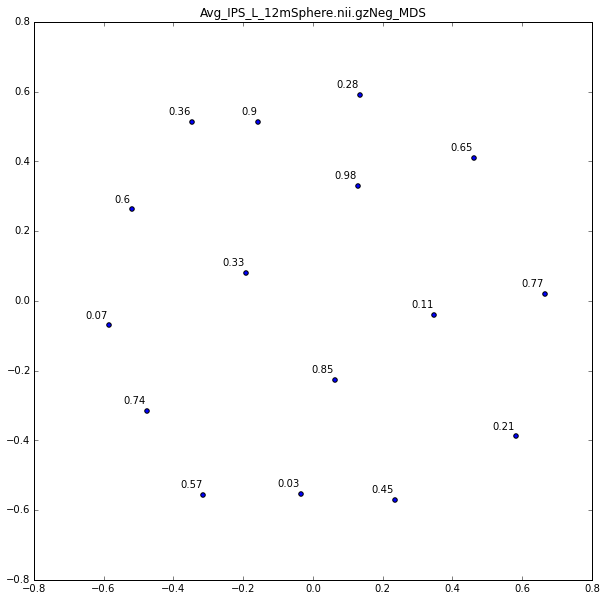

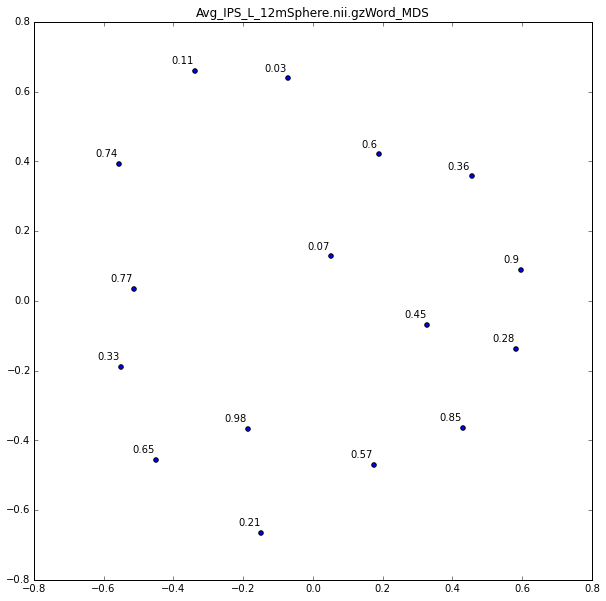

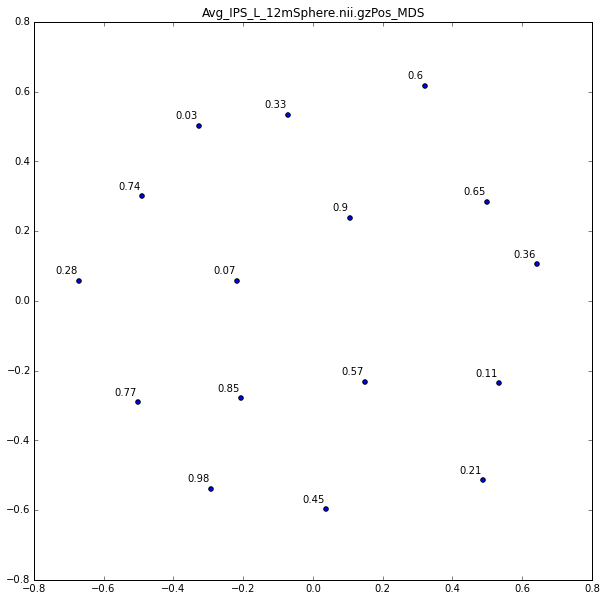

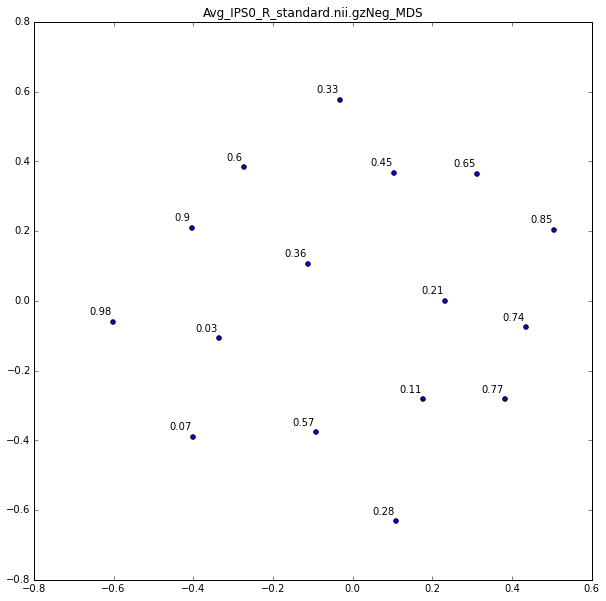

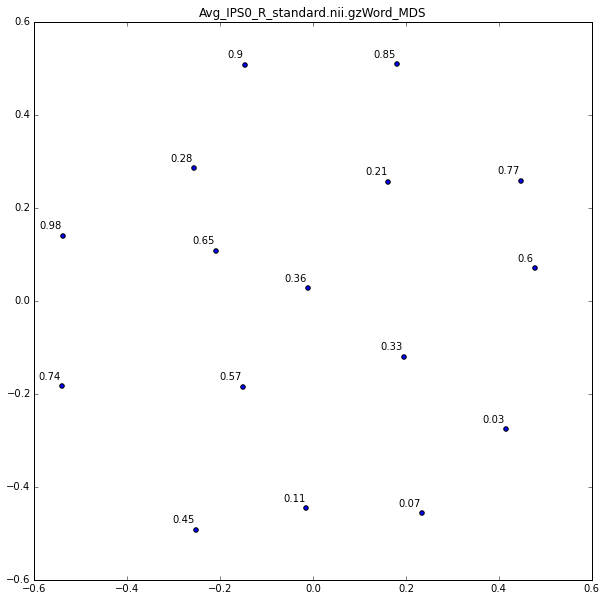

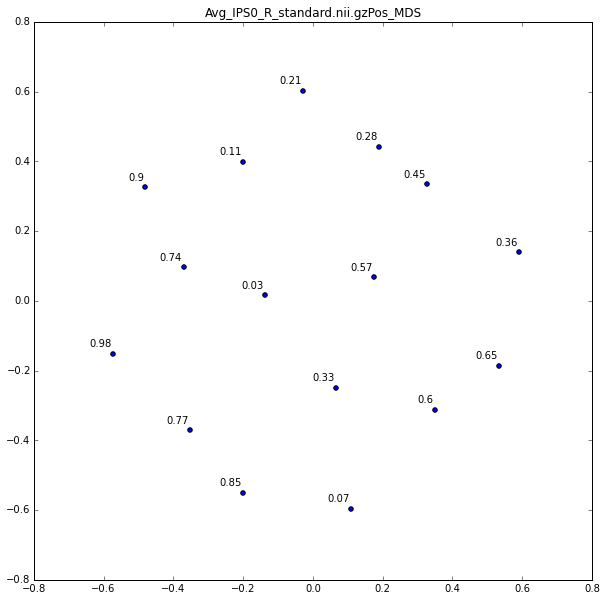

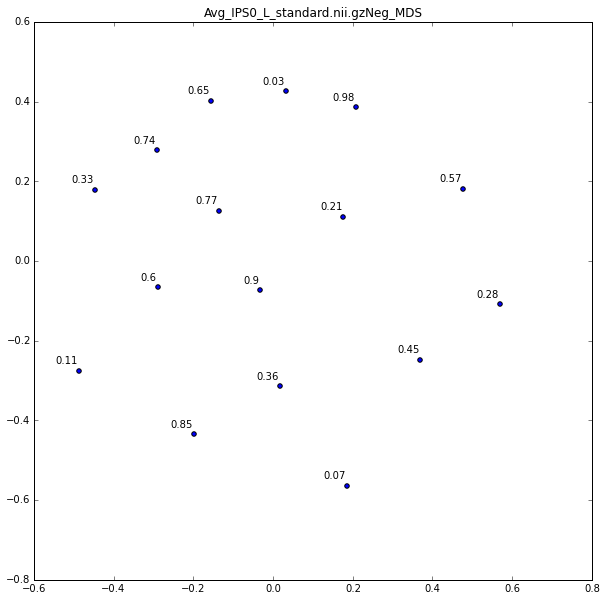

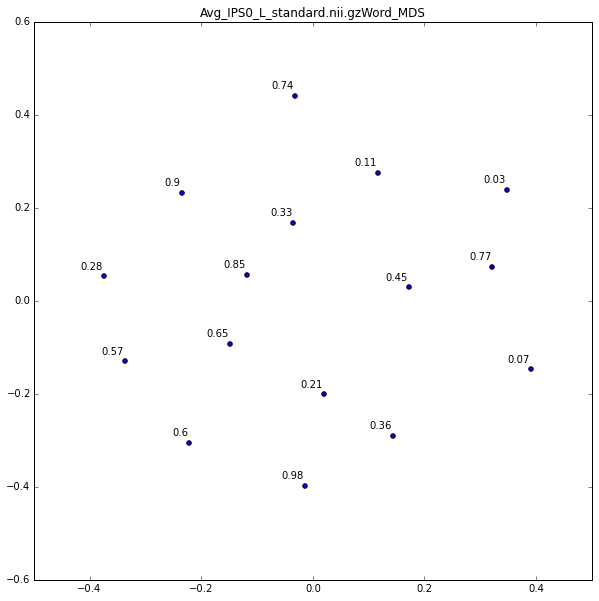

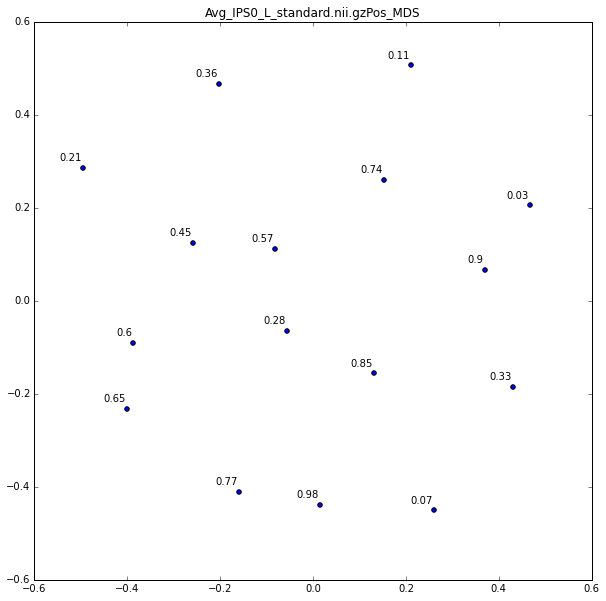

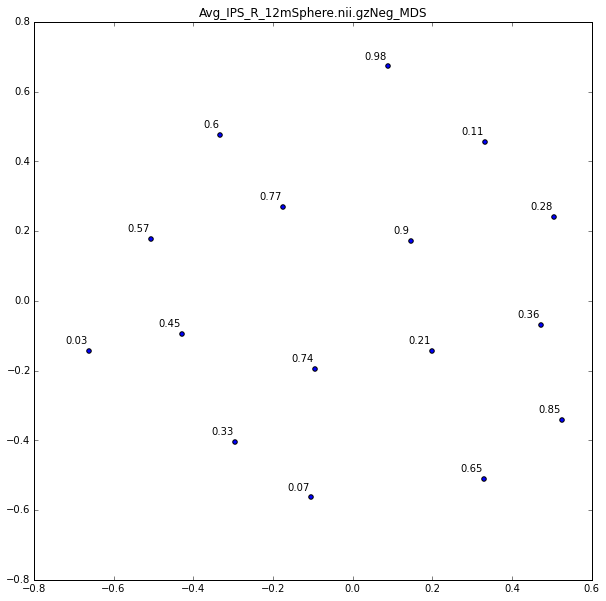

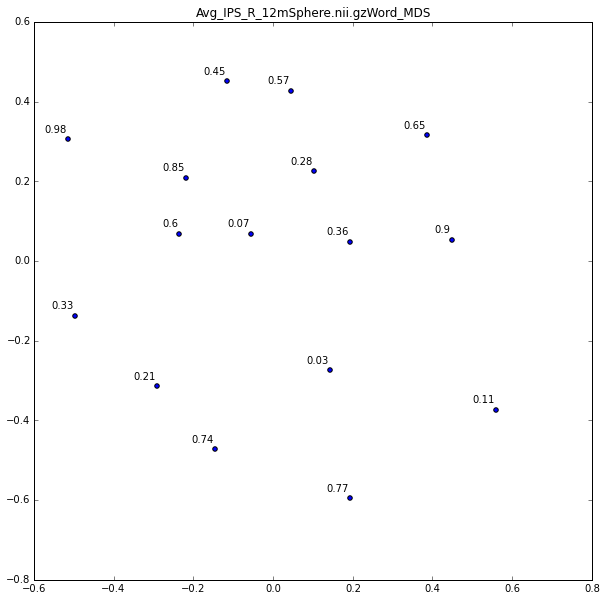

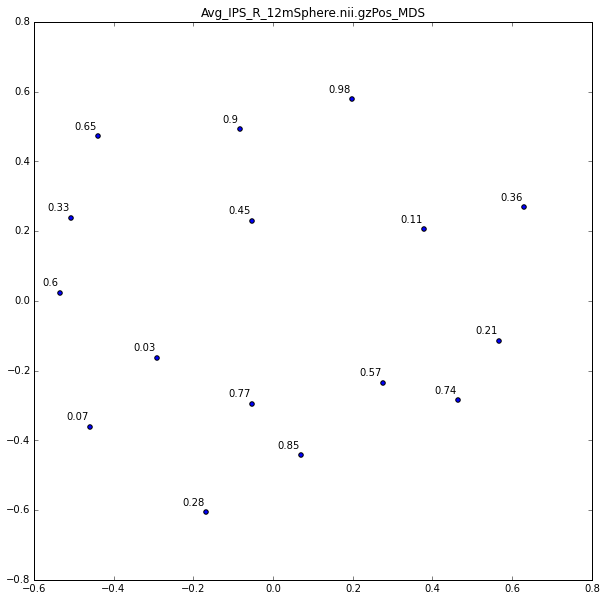

In [38]:
for ROI in brain_mat_dict.keys():
    for TASK in brain_mat_dict[ROI].keys():
        avg_mat = np.nanmean(brain_mat_dict[ROI][TASK], axis=0)
        tit = 'Avg_'+ROI+TASK+'_MDS'
        mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
        pos = mds.fit(avg_mat).embedding_
        # Rotate the data
        #clf = PCA(n_components=2)
        #pos = clf.fit_transform(pos)
        plot_mds(pos,LABELS,tit)

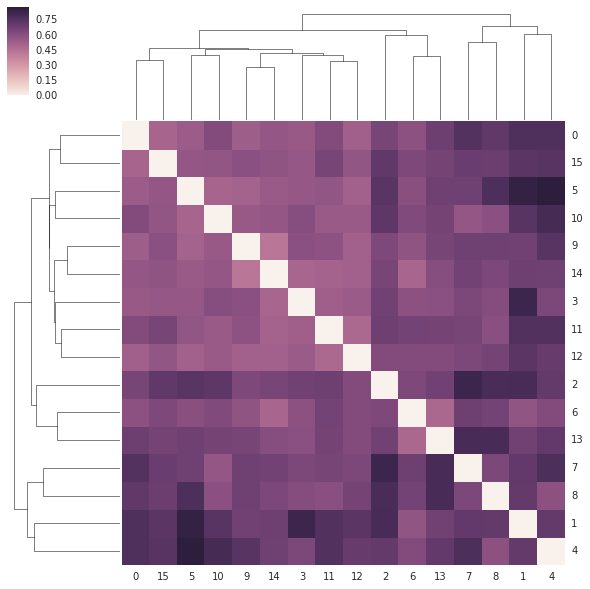

In [47]:
import seaborn as sns
ex_average_mat = np.nanmean(brain_mat_dict[ROIS[2]]['Neg'],axis=0)
g = sns.clustermap(ex_average_mat,)
reordered = [LABELS[x] for x in g.dendrogram_row.reordered_ind]

In [48]:
reordered = [LABELS[x] for x in g.dendrogram_row.reordered_ind]
reordered

['0.03',
 '0.98',
 '0.33',
 '0.65',
 '0.6',
 '0.9',
 '0.21',
 '0.74',
 '0.77',
 '0.11',
 '0.36',
 '0.85',
 '0.45',
 '0.57',
 '0.07',
 '0.28']

In [42]:
brain_mat_dict.keys()

['IPS_L_12mSphere.nii.gz',
 'IPS0_R_standard.nii.gz',
 'IPS0_L_standard.nii.gz',
 'IPS_R_12mSphere.nii.gz']